**Τεχνικές Εξόρυξης Δεδομένων εργασία 1**

Συντελεστές:


*   Κυριακόπουλος Βασίλειος 1115201700064
*   Κουτσάκης Δημήτριος 1115201700061



**Import necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import numpy as np
import re
import string

%matplotlib inline

**Read Netflix titles data into a dataframe**

In [2]:
df = pd.read_csv('netflix_titles.csv').fillna('')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,,Nasty C,,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# Part 1: Ερωτήματα

**Ερώτημα 1:**
Ποιό είδος υπερτερεί, οι ταινίες ή οι σειρές ;

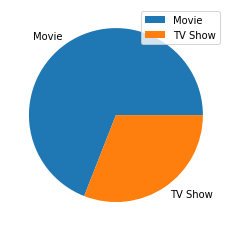

In [3]:
typeCounts = df[['type','show_id']].groupby('type').count().rename(columns={'show_id':'count'})
typeCounts.plot.pie(x='type',y='count',ylabel='')

**Ερώτημα 2:**
Τα τελευταία χρόνια το netflix επενδύει περισσότερο σε ταινίες ή σε σειρές;

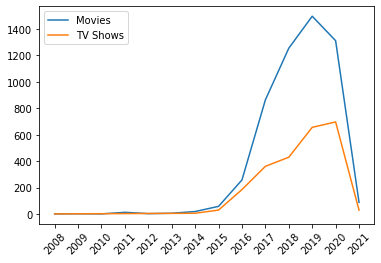

In [4]:
MoviesPerYear = df[['show_id']].loc[df["type"] == "Movie"].loc[df['date_added']!=''].groupby(df["date_added"].map(lambda x: x[-4:])).count().reset_index().rename(columns={'date_added':'year_added','show_id':'count'})
TVShowsPerYear = df[['show_id']].loc[df["type"] == "TV Show"].loc[df['date_added']!=''].groupby(df["date_added"].map(lambda x: x[-4:])).count().reset_index().rename(columns={'date_added':'year_added','show_id':'count'})

plt.plot(MoviesPerYear["year_added"], MoviesPerYear["count"])
plt.plot(TVShowsPerYear["year_added"], TVShowsPerYear["count"])
plt.xticks(rotation=45)
plt.legend(['Movies','TV Shows'])


**Ερώτημα 3:**
Ποιά χώρα έχει το περισσότερο περιεχόμενο;

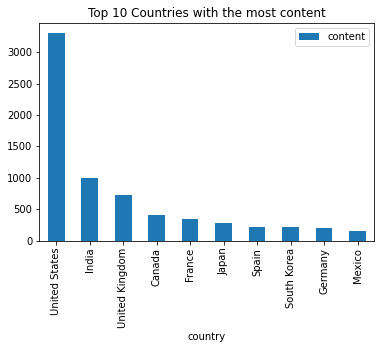

In [5]:
countriesByContent = df[['country','show_id']].loc[df['country']!=""].replace(to_replace=r',$',value='',regex=True)
countriesByContent = countriesByContent.assign(country=countriesByContent['country'].str.split(', ')).explode('country').groupby('country',as_index=False).count().rename(columns={'show_id':'content'}).sort_values(by=['content'],ascending=False)
countriesByContent.head(10).plot.bar(x='country',y='content',rot=90,title='Top 10 Countries with the most content')

In [6]:
print('Country with the most content: ' + countriesByContent.values[0][0] + ' with ' + str(countriesByContent.values[0][1]) + ' Movies and TV Shows')

Country with the most content: United States with 3297 Movies and TV Shows


**Ερώτημα 4:**
Τι είδους περιεχόμενο έχει κάθε χώρα;

In [7]:
countryGenres = df[['country','listed_in','show_id']].loc[df['country']!=""].loc[df['listed_in']!=""].replace(to_replace=r',$',value='',regex=True)
countryGenres = countryGenres.assign(country=countryGenres['country'].str.split(', ')).explode('country').assign(listed_in=countryGenres['listed_in'].str.split(', ')).explode('listed_in').groupby(['country','listed_in'],as_index=False).count().rename(columns={'listed_in':'genre','show_id':'content'})
for row in countryGenres.values:
  print(row[0] + ' has ' + str(row[2]) + ' ' + row[1])

Afghanistan has 1 Documentaries
Afghanistan has 1 International Movies
Albania has 1 Dramas
Albania has 1 International Movies
Algeria has 1 Classic Movies
Algeria has 2 Dramas
Algeria has 2 International Movies
Angola has 1 Action & Adventure
Angola has 1 International Movies
Argentina has 3 Action & Adventure
Argentina has 3 Children & Family Movies
Argentina has 1 Classic Movies
Argentina has 13 Comedies
Argentina has 6 Crime TV Shows
Argentina has 1 Cult Movies
Argentina has 9 Documentaries
Argentina has 2 Docuseries
Argentina has 32 Dramas
Argentina has 3 Horror Movies
Argentina has 6 Independent Movies
Argentina has 51 International Movies
Argentina has 14 International TV Shows
Argentina has 3 Kids' TV
Argentina has 1 LGBTQ Movies
Argentina has 1 Movies
Argentina has 5 Music & Musicals
Argentina has 1 Reality TV
Argentina has 3 Romantic Movies
Argentina has 2 Romantic TV Shows
Argentina has 1 Sci-Fi & Fantasy
Argentina has 17 Spanish-Language TV Shows
Argentina has 6 Sports Movi

**Ερώτημα 5:**
Ετοιμάστε γραφήματα που δειχνουν τους ηθοποιούς με τις περισσότερες ταινίες σε
κάθε χώρα. Κάντε το ίδιο και για τις σειρές.

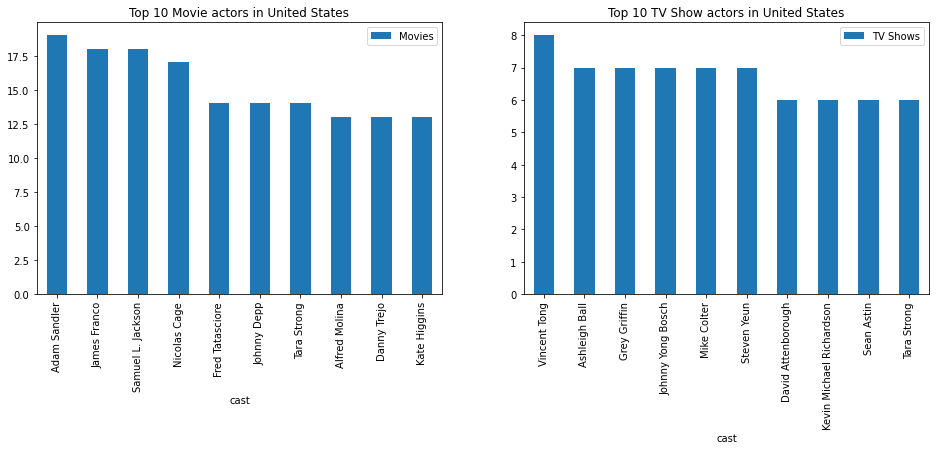

In [8]:
moviesPerActorPerCountry = df[['country','cast','show_id']].loc[df["type"] == "Movie"].loc[df['country']!=""].loc[df['cast']!=""].replace(to_replace=r',$',value='',regex=True)
moviesPerActorPerCountry = moviesPerActorPerCountry.assign(country=moviesPerActorPerCountry['country'].str.split(', ')).explode('country').assign(cast=moviesPerActorPerCountry['cast'].str.split(', ')).explode('cast').groupby(['country','cast'],as_index=False).count().rename(columns={'show_id':'Movies'})
moviesPerActorPerCountry = moviesPerActorPerCountry.sort_values(by=['country','Movies'],ascending=[True,False]).groupby(['country']).head(10).reset_index(drop=True)

tvShowsPerActorPerCountry = df[['country','cast','show_id']].loc[df["type"] == "TV Show"].loc[df['country']!=""].loc[df['cast']!=""].replace(to_replace=r',$',value='',regex=True)
tvShowsPerActorPerCountry = tvShowsPerActorPerCountry.assign(country=tvShowsPerActorPerCountry['country'].str.split(', ')).explode('country').assign(cast=tvShowsPerActorPerCountry['cast'].str.split(', ')).explode('cast').groupby(['country','cast'],as_index=False).count().rename(columns={'show_id':'TV Shows'})
tvShowsPerActorPerCountry = tvShowsPerActorPerCountry.sort_values(by=['country','TV Shows'],ascending=[True,False]).groupby(['country']).head(10).reset_index(drop=True)

# Αλλάξτε την παρακάτω μεταβλητή για να εμφανίσετε τα γραφήματα για τους top 10 ηθοποιούς ταινιών και σειρών για την αντίστοιχη χώρα
queryCountry = 'United States'

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
moviesPerActorPerCountry.loc[moviesPerActorPerCountry['country']==queryCountry].plot.bar(x='cast',y='Movies',ax=ax,title='Top 10 Movie actors in ' + queryCountry)
ax = plt.subplot(1,2,2)
tvShowsPerActorPerCountry.loc[tvShowsPerActorPerCountry['country']==queryCountry].plot.bar(x='cast',y='TV Shows',ax=ax,title='Top 10 TV Show actors in ' + queryCountry)

**Ερώτημα 6:**
Το netflix υποστηρίζει ότι παρέχει πλούσιο περιεχόμενο για όλες τις ηλικίες.
Αληθεύει αυτό; Φτιάξτε ένα γράφημα το οποίο συγκεντρώνει το πλήθος των
ταινιων ανάλογα με την προτεινόμενη ηλικία (αναφερόμαστε στη στήλη rating). Τα
όρια καθορίζονται σύμφωνα με τον παρακάτω πίνακα. Κάντε το ίδιο γράφημα και
για τις σειρές. 

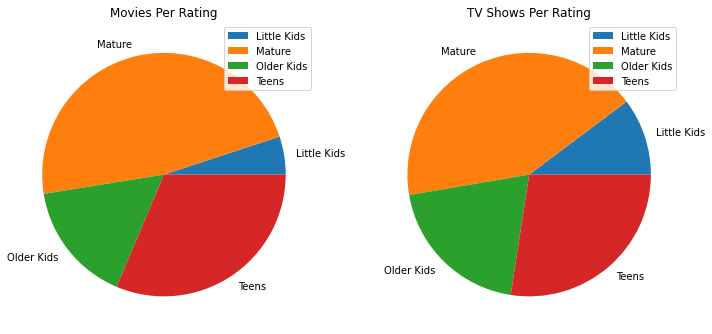

In [9]:
contentPerRating = df[['show_id', 'type', 'rating']].loc[df['type']!=""].loc[df['rating']!=""].replace(['G', 'TV-Y', 'TV-G'], 'Little Kids').replace(['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG'], 'Older Kids').replace(['PG-13', 'TV-14'], 'Teens').replace(['R', 'NC-17', 'TV-MA'], 'Mature').loc[df['rating']!='NR'].loc[df['rating']!='UR']

fig = plt.figure(figsize=(12,10))

moviesPerRating = contentPerRating[['rating','show_id']].loc[contentPerRating['type']=="Movie"].groupby('rating').count().rename(columns={'show_id':'count'})
ax = plt.subplot(1,2,1)
moviesPerRating.plot.pie(y='count',x='rating',ax=ax,title='Movies Per Rating',ylabel='')

tvShowsPerRating = contentPerRating[['rating','show_id']].loc[contentPerRating['type']=="TV Show"].groupby('rating').count().rename(columns={'show_id':'count'})
ax = plt.subplot(1,2,2)
tvShowsPerRating.plot.pie(y='count',x='rating',ax=ax,title='TV Shows Per Rating',ylabel='')


**Ερώτημα 7:**
Αν ένας παραγωγός ήθελε να έχει υψηλή ακροαματικότητα, σκέφτεται ότι θα ήταν
ίσως καλύτερα να βγάλει την ταινία του σε μία εποχή που δεν υπάρχει
ανταγωνισμός. Κάντε ένα γράφημα με το περιεχόμενο που προστίθεται ανά μήνα
για να τον βοηθήσετε να επιλέξει τη σωστή χρονική περίοδο.

Best month to release new content: February


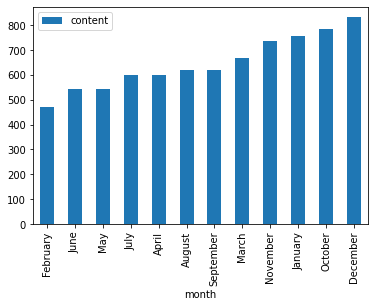

In [10]:
contentPerMonth = df[['show_id']].loc[df['date_added']!=''].groupby(df["date_added"].map(lambda x: x.strip().split(' ')[0])).count().reset_index().rename(columns={'date_added':'month','show_id':'content'}).sort_values(by='content')
contentPerMonth.plot.bar(x='month',y='content')
print('Best month to release new content: ' + contentPerMonth.values[0][0])

**Ερώτημα 8:**
Ετοιμάστε ένα γράφημα που παρουσιάζει συγκεντρωτικά τα είδη του περιεχομένου
(αναφερόμαστε στη στήλη listed_in).

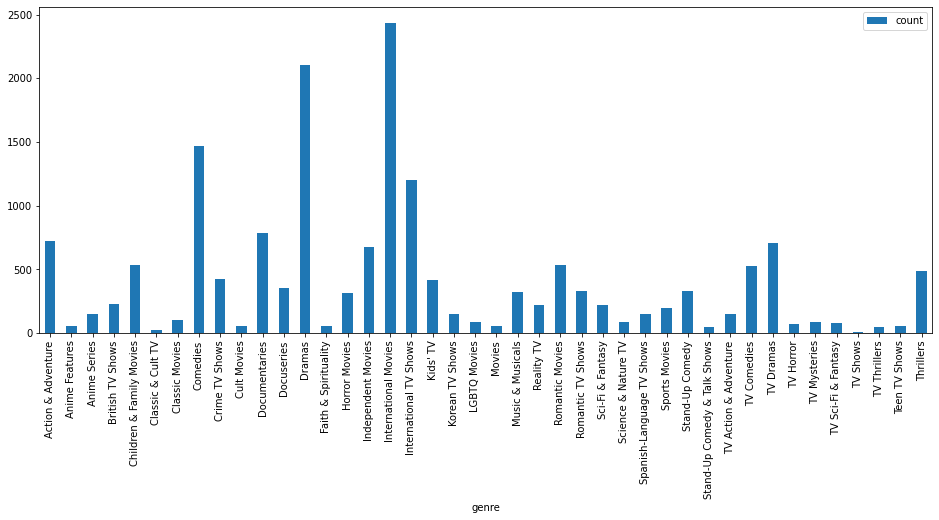

In [11]:
genres = df[['listed_in','show_id']].loc[df['listed_in']!=""].replace(to_replace=r',$',value='',regex=True)
genres = genres.assign(listed_in=genres['listed_in'].str.split(', ')).explode('listed_in').groupby('listed_in',as_index=False).count().rename(columns={'listed_in':'genre','show_id':'count'})
genres.plot.bar(x='genre',y='count',rot=90, figsize = (16, 6))

**Ερώτημα 9:**
Μελετηστε τους σκηνοθέτες ανά χώρα και παρουσιάστε σχετικά γραφήματα.

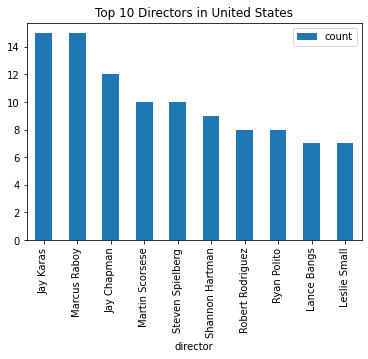

In [12]:
directorsPerCountry = df[['country','director','show_id']].loc[df['country']!=""].loc[df['director']!=""].replace(to_replace=r',$',value='',regex=True)
directorsPerCountry = directorsPerCountry.assign(country=directorsPerCountry['country'].str.split(',')).explode('country').assign(director=directorsPerCountry['director'].str.split(',')).explode('director').groupby(['country','director'],as_index=False).count().rename(columns={'show_id':'count'})
directorsPerCountry = directorsPerCountry.sort_values(by=['country','count'],ascending=[True,False]).groupby(['country']).head(10).reset_index(drop=True)
directorsPerCountry

# Αλλάξτε την παρακάτω μεταβλητή για να εμφανίσετε τα γραφήματα για τους top 10 σκηνοθέτες για την αντίστοιχη χώρα
queryCountry = 'United States'

directorsPerCountry.loc[directorsPerCountry['country']==queryCountry].plot.bar(x='director',y='count',title='Top 10 Directors in ' + queryCountry)

**Ερώτημα 10:**
Μελετήστε τις σειρές και παρουσιάστε ένα γράφημα που τις δείχνει ανάλογα με το
αριθμό των seasons.

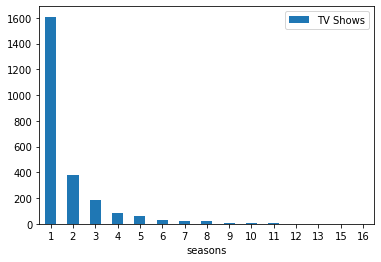

In [13]:
seriesBySeasons = df[['show_id']].loc[df['type']=='TV Show'].groupby(df['duration'].map(lambda x : int(x.split()[0]))).count().reset_index().rename(columns={'duration':'seasons','show_id':'TV Shows'})
seriesBySeasons.plot.bar(x='seasons',y='TV Shows',rot=0)

**Ερώτημα 11:**
Αξιοποιήστε τα υπόλοιπα αρχεία της εργασίας για να απαντήσετε στο ερώτημα:
Ποιές είναι οι ταινίες με την πιο υψηλή βαθμολογία; Θα χρειαστεί να συννενώσετε
κατάλληλα τα αρχεία που σας δίνονται ώστε να κρατήσετε τις ταινίες του netflix για
τις οποίες υπάρχουν ratings στο IMBD.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


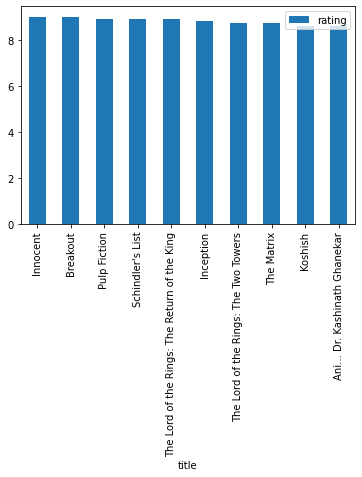

In [14]:
imdbRatings = pd.read_csv('IMDb ratings.csv')[['imdb_title_id','weighted_average_vote']]
imdbMovies = pd.read_csv('IMDb movies.csv')[['imdb_title_id','original_title']]
imdbMoviesWithRatings = pd.merge(imdbMovies, imdbRatings, on='imdb_title_id', how='inner').rename(columns={'original_title':'title', 'weighted_average_vote':'rating'})
netflixMoviesWithRatings = pd.merge(df[['title']], imdbMoviesWithRatings, on='title', how='inner')[['title','rating']].sort_values(by='rating',ascending=False)
netflixMoviesWithRatings.head(10).plot.bar(x='title',y='rating')

# Part 2: Recommendation system 

In [15]:
netflixMovies = df[['show_id','title','description']]
netflixMovies['title_description'] = netflixMovies[netflixMovies.columns[1:]].apply(lambda x : ' '.join(x.dropna().astype(str)), axis=1)
netflixMovies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,show_id,title,description,title_description
0,s1,3%,In a future where the elite inhabit an island ...,3% In a future where the elite inhabit an isla...
1,s2,7:19,After a devastating earthquake hits Mexico Cit...,7:19 After a devastating earthquake hits Mexic...
2,s3,23:59,"When an army recruit is found dead, his fellow...","23:59 When an army recruit is found dead, his ..."
3,s4,9,"In a postapocalyptic world, rag-doll robots hi...","9 In a postapocalyptic world, rag-doll robots ..."
4,s5,21,A brilliant group of students become card-coun...,21 A brilliant group of students become card-c...
...,...,...,...,...
7782,s7783,Zozo,When Lebanon's Civil War deprives Zozo of his ...,Zozo When Lebanon's Civil War deprives Zozo of...
7783,s7784,Zubaan,A scrappy but poor boy worms his way into a ty...,Zubaan A scrappy but poor boy worms his way in...
7784,s7785,Zulu Man in Japan,"In this documentary, South African rapper Nast...","Zulu Man in Japan In this documentary, South A..."
7785,s7786,Zumbo's Just Desserts,Dessert wizard Adriano Zumbo looks for the nex...,Zumbo's Just Desserts Dessert wizard Adriano Z...


Αρχικοποίηση spaCy για να κάνουμε αφαίρεση stopwords lemmatization:

In [16]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load('en_core_web_sm')

     |████████████████████████████████| 1.5MB 8.1MB/s 
Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (56.0.0)
Requirement already up-to-date: wheel in /usr/local/lib/python3.7/dist-packages (0.36.2)
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 12.8 MB 88 kB/s 
     |████████████████████████████████| 456 kB 67.3 MB/s 
     |████████████████████████████████| 9.1 MB 47.7 MB/s 
     |████████████████████████████████| 1.1 MB 72.1 MB/s 
     |████████████████████████████████| 113 kB 48.4 MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=f34ed4b54e7f5ef831f6d239eada49bb755ea098da2b1d2b1af6ddbfaa3905d4
  Stored in directory: /root/.cache/pip/wheels/83/a6/12/bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870
Successfully built smart-open
  Attempting uninstall: catalogue
    Found existing installatio

Άντληση συνόλου stopwords

In [17]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS

Ορισμός συνάρτησης για αφαίρεση σημείων στήξης, αριθμών και περίεργων συμβόλων:

In [18]:
def text_preprocessing(text):
  # Convert to lowercase
  text = text.lower()
  # Remove numbers
  text = re.sub(r'\d+','',text)
  # Remove punctuation 
  text = text.translate(str.maketrans('','',string.punctuation))
  # Remove whitespaces
  text = text.strip()
  # Remove stopwords and lemmatize
  text_tokens = nlp(text)
  text_lemmas = [token.lemma_ for token in text_tokens if not token.is_stop and token.lemma_ not in stop_words]

  return ' '.join(text_lemmas)

Εφαρμογή της στα descriptions:

In [19]:
netflixMovies['preprocessed_description'] = netflixMovies['title_description'].apply(lambda row : text_preprocessing(row))
netflixMovies[['show_id','title','preprocessed_description']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,title,preprocessed_description
0,s1,3%,future elite inhabit island paradise far crowd...
1,s2,7:19,devastating earthquake hit mexico city trap su...
2,s3,23:59,army recruit find dead fellow soldier force co...
3,s4,9,postapocalyptic world ragdoll robot hide fear ...
4,s5,21,brilliant group student cardcounte expert inte...
...,...,...,...
7782,s7783,Zozo,zozo lebanon civil war deprive zozo family s l...
7783,s7784,Zubaan,zubaan scrappy poor boy worm way tycoon dysfun...
7784,s7785,Zulu Man in Japan,zulu man japan documentary south african rappe...
7785,s7786,Zumbo's Just Desserts,zumbo dessert dessert wizard adriano zumbo loo...


Δημιουργία **boolean BoW** representations για τις ταινίες:

In [20]:
countVectorizer = CountVectorizer(ngram_range=(1,2),binary=True,min_df=3,max_df=0.01)
booleanBoW = countVectorizer.fit_transform(netflixMovies['preprocessed_description'].values).astype(bool).todense()
booleanBoW.shape

(7787, 8438)

Υπολογισμός **Jaccard/Tanimoto coefficient** για τις ταινίες:

In [21]:
jaccard_similarities = 1 - pairwise_distances(booleanBoW,metric='jaccard')

Υπολογισμός 100 πιο όμοιων ταινιών κάθε ταινίας με βάση το **Jaccard/Tanimoto coefficient** representation:

In [23]:
similar_movies_booleanBoW = {}
for i in range(netflixMovies.shape[0]):
  similar_movies_booleanBoW[netflixMovies['title'][i]] = [netflixMovies['title'][movie[0]] for movie in sorted(list(enumerate(jaccard_similarities[i])),key=lambda x : x[1],reverse=True)[:101] if movie[0] != i]

Δημιουργία **TF-IDF** representations για τις ταινίες: 

In [24]:
tfIdfVectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.01)
tfIdf = tfIdfVectorizer.fit_transform(netflixMovies['preprocessed_description'].values)
tfIdf

<7787x15941 sparse matrix of type '<class 'numpy.float64'>'
	with 92216 stored elements in Compressed Sparse Row format>

Υπολογισμός cosine similarity για όλα τα ζεύγη ταινιών μεταξύ τους:

In [25]:
cosine_similarities = cosine_similarity(tfIdf)

Υπολογισμός 100 πιο όμοιων ταινιών κάθε ταινίας με βάση το **tf-Idf** representation:

In [26]:
similar_movies_tfidf = {}
for i in range(netflixMovies.shape[0]):
  similar_movies_tfidf[netflixMovies['title'][i]] = [netflixMovies['title'][movie[0]] for movie in sorted(list(enumerate(cosine_similarities[i])),key=lambda x : x[1],reverse=True)[:101] if movie[0] != i]

Ορισμός συνάρτησης get_similar_movies1:

In [27]:
def get_similar_movies1(title, N=10, method='boolean'):
  if method == 'boolean':
    if title not in similar_movies_booleanBoW:
      return []
    return similar_movies_booleanBoW[title][:N]
  elif method == 'tf-idf':
    if title not in similar_movies_tfidf:
      return []
    return similar_movies_tfidf[title][:N]
  else:
    raise Exception('Invalid method ' + method)

Μερικά παραδείγματα:

In [28]:
for i in get_similar_movies1('Zumbo\'s Just Desserts', N=10,method='tf-idf'):
  print(i)

Willy Wonka & the Chocolate Factory
Nailed It! France
Charlie and the Chocolate Factory
Nailed It! Holiday!
The Apartment
Nailed It! Mexico
Rock My Heart
Ink Master
Amateur
Aadu 2


In [29]:
for i in get_similar_movies1('Zumbo\'s Just Desserts', N=10,method='boolean'):
  print(i)

Nailed It! France
Ink Master
The Apartment
Aadu 2
Charlie and the Chocolate Factory
Nailed It! Mexico
Willy Wonka & the Chocolate Factory
Rock My Heart
Malibu Rescue: The Next Wave
Fit for Fashion


In [30]:
for i in get_similar_movies1('Zozo', N=10,method='tf-idf'):
  print(i)

Ken Burns: The Civil War
Lincoln
Gun City
El testigo
The Endless Trench
The Last Face
Free State of Jones
Vizontele Tuuba
Beasts of No Nation
Red vs. Blue


Ορισμός συνάρτησης get_similar_movies2:

In [31]:
def get_similar_movies2(description,N=10,method='tf-idf'):
  if method == 'tf-idf':
    description = text_preprocessing(description)
    tfIdfRepr = tfIdfVectorizer.transform([description])
    sims = cosine_similarity(tfIdf,tfIdfRepr)
    return sorted(zip(netflixMovies['title'].values,sims),key=lambda x : x[1],reverse=True)[:N]
  elif method == 'boolean':
    description = text_preprocessing(description)
    bowRepr = countVectorizer.transform([description]).astype(np.bool).toarray()
    sims = 1 - pairwise_distances(X=booleanBoW,Y=bowRepr,metric='jaccard')
    return sorted(zip(netflixMovies['title'].values,sims),key=lambda x : x[1],reverse=True)[:N]
  else:
    raise Exception('Invalid method ' + method)

Μερικά παραδείγματα:

In [41]:
for i in get_similar_movies2('War between America and Vietnam', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

The Sapphires : 0.34236463323907557
The Vietnam War: A Film by Ken Burns and Lynn Novick : 0.33104422204189743
Platoon : 0.3171921512775852
Thi Mai : 0.2801646279257803
Da 5 Bloods : 0.2763036476219275
Hamburger Hill : 0.27040311945662027
My Stupid Boss 2 : 0.25387544240627813
3% : 0.0
7:19 : 0.0
23:59 : 0.0


In [42]:
for i in get_similar_movies2('War between America and Vietnam', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

The Sapphires : 0.1428571428571429
Platoon : 0.11111111111111116
Thi Mai : 0.09999999999999998
Hamburger Hill : 0.09090909090909094
My Stupid Boss 2 : 0.0714285714285714
Da 5 Bloods : 0.0625
The Vietnam War: A Film by Ken Burns and Lynn Novick : 0.052631578947368474
3% : 0.0
7:19 : 0.0
23:59 : 0.0


In [43]:
for i in get_similar_movies2('Robots', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

Real Steel : 0.510993781043332
Robot Trains : 0.44446515130520614
ViR: The Robot Boy : 0.4392581771821902
Tobot : 0.35187006768662366
Gurren Lagann : 0.3369579406399719
Better Than Us : 0.3214767304025398
Power Players : 0.31773805810118494
9 : 0.29925283385804696
Robozuna : 0.29727877637720707
Noddy Toyland Detective : 0.2814881815612288


In [44]:
for i in get_similar_movies2('Robots', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

Gurren Lagann : 0.16666666666666663
Better Than Us : 0.1428571428571429
Real Steel : 0.1428571428571429
Tobot : 0.1428571428571429
9 : 0.125
Automata : 0.125
Power Players : 0.125
Robot Trains : 0.125
Terminator Salvation : 0.125
Mystery Science Theater 3000: The Return : 0.11111111111111116


In [45]:
for i in get_similar_movies2('Pandemic', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

Pandemic: How to Prevent an Outbreak : 0.3354203987534745
Coronavirus, Explained : 0.3079711007895488
3% : 0.0
7:19 : 0.0
23:59 : 0.0
9 : 0.0
21 : 0.0
46 : 0.0
122 : 0.0
187 : 0.0


In [46]:
for i in get_similar_movies2('Pandemic', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

3% : 0.0
7:19 : 0.0
23:59 : 0.0
9 : 0.0
21 : 0.0
46 : 0.0
122 : 0.0
187 : 0.0
706 : 0.0
1920 : 0.0


In [47]:
for i in get_similar_movies2('Science fiction', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

Alien Worlds : 0.3215984012507619
John & Jane : 0.30063263257751066
The Silence of the Marsh : 0.27710996306910535
Bill Nye: Science Guy : 0.27400936568263556
Pulp Fiction : 0.25994752256377196
Brainchild : 0.23429289895075722
Sid the Science Kid : 0.23219302787976584
Mars : 0.22765183604817002
Stranger than Fiction : 0.22232323286536407
Strangers from Hell : 0.21584571423331173


In [48]:
for i in get_similar_movies2('Science fiction', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

Alien Worlds : 0.15384615384615385
Brainchild : 0.1428571428571429
Connected : 0.1428571428571429
NOVA: Prediction by the Numbers : 0.1428571428571429
Project Mc² : 0.125
Cold Case Files : 0.11111111111111116
Earth to Luna! : 0.11111111111111116
Igor : 0.11111111111111116
John & Jane : 0.11111111111111116
Mars : 0.11111111111111116


In [49]:
for i in get_similar_movies2('Music concert', N=20,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

One Heart: The A.R. Rahman Concert Film : 0.37409758460742376
Richard Pryor: Live in Concert : 0.3536276466599124
Falz Experience : 0.3079192271767331
Once In A Lifetime Sessions with TLC : 0.28914434762528185
Justin Bieber: Never Say Never : 0.27302775778429667
Mayday Life : 0.2539718864185208
2015 Dream Concert : 0.2407128626411797
Emicida: AmarElo - It’s All For Yesterday : 0.24057388921869685
Los Tigres del Norte at Folsom Prison : 0.23156954263972285
Sky Tour: The Movie : 0.22458349165756358
Get Him to the Greek : 0.22450920395797994
Ratones Paranoicos: The Band that Rocked Argentina : 0.2179320302881531
We Summon the Darkness : 0.2167199997204141
Nasha Natasha : 0.21449310144843153
One Direction: This Is Us : 0.21110133956671157
Hans Zimmer: Live in Prague : 0.20632041018968783
Once In A Lifetime Sessions with Nile Rodgers : 0.19842420712962647
Chris Brown: Welcome to My Life : 0.19608354682620824
The Magic School Bus Rides Again In the Zone : 0.18901050541726064
Once in a Lifeti

In [50]:
for i in get_similar_movies2('Music concert', N=20,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

Justin Bieber: Never Say Never : 0.125
Once In A Lifetime Sessions with TLC : 0.125
One Heart: The A.R. Rahman Concert Film : 0.11111111111111116
Sky Tour: The Movie : 0.11111111111111116
2015 Dream Concert : 0.09999999999999998
Falz Experience : 0.09999999999999998
Mayday Life : 0.09999999999999998
Shawn Mendes: Live in Concert : 0.09999999999999998
Hans Zimmer: Live in Prague : 0.09090909090909094
Los Tigres del Norte at Folsom Prison : 0.09090909090909094
Emicida: AmarElo - It’s All For Yesterday : 0.08333333333333337
Nasha Natasha : 0.08333333333333337
One Direction: This Is Us : 0.08333333333333337
Ratones Paranoicos: The Band that Rocked Argentina : 0.08333333333333337
Chris Brown: Welcome to My Life : 0.0714285714285714
Once In A Lifetime Sessions with Nile Rodgers : 0.0714285714285714
We Summon the Darkness : 0.0714285714285714
Get Him to the Greek : 0.06666666666666665
Mike Birbiglia: What I Should Have Said Was Nothing: Tales from My Secret Public Journal : 0.0666666666666666

In [51]:
for i in get_similar_movies2('Space', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

Space Force : 0.5003590177203311
Star Trek: Deep Space Nine : 0.4990371141252174
Space Racers : 0.41670614045649607
The Mars Generation : 0.4094698437467324
Pinkfong & Baby Shark's Space Adventure : 0.362481290563173
The Epic Tales of Captain Underpants in Space : 0.32667039820958427
Parasyte: The Maxim : 0.3264578767457386
Gagarin: First in Space : 0.31243431719973724
Pocoyo Halloween: Space Halloween : 0.30972747587245897
The Magic School Bus Rides Again Kids In Space : 0.30492546625140865


In [52]:
for i in get_similar_movies2('Space', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

14 Minutes from Earth : 0.25
Houston, We Have a Problem! : 0.16666666666666663
Parasyte: The Maxim : 0.16666666666666663
Antariksha Ke Rakhwale : 0.1428571428571429
Gagarin: First in Space : 0.1428571428571429
Miniforce X : 0.1428571428571429
Space Force : 0.1428571428571429
The Space Between Us : 0.1428571428571429
A Year In Space : 0.125
Lost in Space : 0.125


In [53]:
for i in get_similar_movies2('Horror', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

American Horror Story : 0.48446982969994956
The Amityville Horror : 0.47515851468491416
Christina P: Mother Inferior : 0.31561749736946026
Haunters: The Art of the Scare : 0.3020690333860253
Horror Homes : 0.2974174118409721
Danur: I Can See Ghosts : 0.2837474141129825
Soul Robbers : 0.2834267922950169
Darna Mana Hai : 0.28219173729787206
Phobia 2 : 0.26682471840087113
Ghosts of War : 0.262130070405208


In [54]:
for i in get_similar_movies2('Horror', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

Christina P: Mother Inferior : 0.16666666666666663
Danur: I Can See Ghosts : 0.16666666666666663
Haunters: The Art of the Scare : 0.1428571428571429
Horror Homes : 0.1428571428571429
Prank Encounters : 0.1428571428571429
Ragini MMS 2 : 0.1428571428571429
Scream 3 : 0.1428571428571429
Eve's Apple : 0.125
I Am the Pretty Thing That Lives in the House : 0.11111111111111116
Penny Dreadful : 0.11111111111111116


In [55]:
for i in get_similar_movies2('Zombies', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

Scooby-Doo on Zombie Island : 0.5514860433259463
Zombie Dumb : 0.47301541617383724
Zombieland : 0.3772999688662322
The Last Kids on Earth : 0.3508320712858263
Rise of the Zombie : 0.3145876478820598
Here Alone : 0.3026797633626016
ParaNorman : 0.28486851284414044
Black Summer : 0.2768067608493
Train to Busan : 0.27568247427180503
The Rezort : 0.2630461327500291


In [56]:
for i in get_similar_movies2('Zombies', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

Zombieland : 0.25
Here Alone : 0.1428571428571429
The Last Kids on Earth : 0.1428571428571429
Rise of the Zombie : 0.125
Scooby-Doo on Zombie Island : 0.125
My Babysitter's a Vampire : 0.11111111111111116
Train to Busan : 0.11111111111111116
ParaNorman : 0.09999999999999998
Zombie Dumb : 0.09999999999999998
Bill Burr: I'm Sorry You Feel That Way : 0.09090909090909094


In [57]:
for i in get_similar_movies2('Internet', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

Ralph Breaks the Internet: Wreck-It Ralph 2 : 0.5514558597059731
Internet Famous : 0.5018602643477973
The Platform : 0.4127423921954115
Jem and the Holograms : 0.34007723883688745
Last Tango in Halifax : 0.33219523595583095
Click for Murder : 0.31670474578959196
​​Kuch Bheege Alfaaz : 0.3147233260084438
Jezebel : 0.301806747303761
Abzurdah : 0.2926641150182944
The King's Avatar : 0.2869128678286888


In [58]:
for i in get_similar_movies2('Internet', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

​​Kuch Bheege Alfaaz : 0.19999999999999996
Jem and the Holograms : 0.19999999999999996
Ralph Breaks the Internet: Wreck-It Ralph 2 : 0.16666666666666663
Sommore: Chandelier Status : 0.16666666666666663
The Platform : 0.16666666666666663
Bad Match : 0.125
Click for Murder : 0.125
Internet Famous : 0.125
Jezebel : 0.125
Last Tango in Halifax : 0.125


In [59]:
for i in get_similar_movies2('Bullying', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

Bully : 0.5389706434098522
Sotus The Series : 0.30006343404007974
My True Friend : 0.29343778122932557
Noblemen : 0.2915533570664836
Hjørdis : 0.2764805253151575
Tong: Memories : 0.27615079738839726
Age of Rebellion : 0.27378705830071903
The Christmas Project : 0.26624292509412634
Nimbe : 0.26219415620786385
King Jack : 0.25784724145044624


In [60]:
for i in get_similar_movies2('Bullying', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

Bully : 0.16666666666666663
My True Friend : 0.1428571428571429
Noblemen : 0.1428571428571429
Karthik Calling Karthik : 0.125
Sotus The Series : 0.125
Age of Rebellion : 0.11111111111111116
Girl's Revenge : 0.11111111111111116
John Leguizamo's Latin History for Morons : 0.11111111111111116
King Jack : 0.11111111111111116
Nimbe : 0.11111111111111116


In [61]:
for i in get_similar_movies2('soap opera', N=10,method='tf-idf'):
  print(i[0] + " : " + str(i[1][0]))

The Windsors : 0.5077288864538045
Palazuelos mi rey : 0.49741831575516715
You Carry Me : 0.44518491619002487
Y.M.I.: Yeh Mera India : 0.38458436808197666
The Phantom of the Opera : 0.28892003818469386
Dynasty : 0.1869048263374429
Arango y Sanint: Ríase el show : 0.16760851766401275
Quartet : 0.16282993780303157
Dawson's Creek : 0.15495077326101994
Painted Faces : 0.1451335834248685


In [62]:
for i in get_similar_movies2('soap opera', N=10,method='boolean'):
  print(i[0] + " : " + str(i[1][0]))

Palazuelos mi rey : 0.2727272727272727
The Windsors : 0.2727272727272727
You Carry Me : 0.1875
Y.M.I.: Yeh Mera India : 0.17647058823529416
Dynasty : 0.09999999999999998
The Phantom of the Opera : 0.07692307692307687
Arango y Sanint: Ríase el show : 0.0714285714285714
Dawson's Creek : 0.0714285714285714
Painted Faces : 0.0714285714285714
Quartet : 0.0625


**Παρατήρηση:** \\
Παρατηρούμε πως σε κάποια αποτελέσματα υπάρχουμ εμφανείς αστοχίες. Αυτό οφείλεται κυρίως στο γεγονός ότι έχουμε μειώσει το λεξιλόγιο με αποτέλεσμα να παραλείπονται αρκετές ομοιότητες. Επιπλέον η ευστοχία των αποτελεσμάτων επηρεάζεται και απο την μετρική που χρησιμοποιείται. Οπότε στο Jaccard similarity αναμένουμε μικρότερη ακρίβεια καθώς ακόμα και σε μικρές διαφορές έχει μεγάλη επίδραση.